### Importing the required the libraries

In [1]:
import pandas as pd
import numpy as np
import time

# data visualization
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE

# K-fold cross validation
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer

# to save the models
import pickle

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to ensure clear background of the visualization and enhance visibility
# sns.set_context('talk')

# pip install ipynb
from ipynb.fs.full.F01_data_preprocessing_functions import feature_set, variance_threshold_selector
from ipynb.fs.full.F03_ML_functions import cv_result, GBRegressor_with_target_transformation
from ipynb.fs.full.F03_ML_functions import error_comparison_with_target_transformation
from ipynb.fs.full.F03_ML_functions import GBRegressor_without_target_transformation
from ipynb.fs.full.F03_ML_functions import error_comparison_without_target_transformation

### Reading the train dataset as pandas dataFrame

In [54]:
train_ = pd.read_csv("train.csv")

# set the 'id' column as index
train_ = train_.set_index('id')

n_samples_train = train_.shape[0]
display(train_.head())
print("No. of rows in the train data = ", n_samples_train)
print("No. of columns in the train data = ", train_.shape[1])

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,B,A,A,A,A,B,A,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
2,A,B,A,A,A,A,A,A,B,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
5,A,B,A,A,B,A,A,A,B,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
10,B,B,A,B,A,A,A,A,B,A,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
11,A,B,A,B,A,A,A,A,B,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


No. of rows in the train data =  188318
No. of columns in the train data =  131


In [55]:
# separating the target variable from the train data
y = train_[['loss']]

# removing the target variable from the train data
train_ = train_.drop('loss', axis=1)

print("Shape of the target variable = ", y.shape)
print("Shape of the train data after removing the target variable = ", train_.shape)

Shape of the target variable =  (188318, 1)
Shape of the train data after removing the target variable =  (188318, 130)


### Reading the test dataset as pandas dataFrame

In [56]:
test_ = pd.read_csv("test.csv")

# set the 'id' column as index
test_ = test_.set_index('id')

display(test_.head())
print("No. of rows in the test data = ", test_.shape[0])
print("No. of columns in the test data = ", test_.shape[1])

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,,,,,,,,
4,A,B,A,A,A,A,A,A,B,A,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
6,A,B,A,B,A,A,A,A,B,A,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
9,A,B,A,B,B,A,B,A,B,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
12,A,A,A,A,B,A,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
15,B,A,A,A,A,B,A,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


No. of rows in the test data =  125546
No. of columns in the test data =  130


In [57]:
# combining the train and test data for basic data preprocessing
df = pd.concat([train_, test_])

print("No. of rows in the entire dataset = ", df.shape[0])
print("No. of columns in the entire dataset = ", df.shape[1])

No. of rows in the entire dataset =  313864
No. of columns in the entire dataset =  130


### Check for missing values and check the data type of the features

In [58]:
# if the number of features > 100, 
# pandas .info() method needs some modification to show the deatils of all the features
pd.options.display.max_info_columns = 150

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313864 entries, 1 to 587634
Data columns (total 130 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat1    313864 non-null  object 
 1   cat2    313864 non-null  object 
 2   cat3    313864 non-null  object 
 3   cat4    313864 non-null  object 
 4   cat5    313864 non-null  object 
 5   cat6    313864 non-null  object 
 6   cat7    313864 non-null  object 
 7   cat8    313864 non-null  object 
 8   cat9    313864 non-null  object 
 9   cat10   313864 non-null  object 
 10  cat11   313864 non-null  object 
 11  cat12   313864 non-null  object 
 12  cat13   313864 non-null  object 
 13  cat14   313864 non-null  object 
 14  cat15   313864 non-null  object 
 15  cat16   313864 non-null  object 
 16  cat17   313864 non-null  object 
 17  cat18   313864 non-null  object 
 18  cat19   313864 non-null  object 
 19  cat20   313864 non-null  object 
 20  cat21   313864 non-null  object 
 21  cat22   3

We can see that, there are no missing values in the dataset

### Separating the features

In [59]:
# list of categorical features
cat_cols = feature_set(df, 'O')

# print("list of categorical features = ", cat_cols)
print("no. of categorical features in the dataset = ", np.size(cat_cols))

# list of continuous features
cont_cols = feature_set(df, 'float64')

# print("list of continuous features = ", cont_cols)
print("no. of continuous features in the dataset = ", np.size(cont_cols))

no. of categorical features in the dataset =  116
no. of continuous features in the dataset =  14


### Ordinal Encoding of the categorical features
Based on your suggestion, I encoded the categorical variables ordinally. Though from the dataset it's not sure how the unique values of each feature are related. 

In ordinal encoding, each unique category value is assigned an integer value and it's easily reversible..
For example, 'A' is 0, 'B' is 1, and 'C' is 2.

I also tried with the one-hot encoding but it increases the number of features a lot. I tried PCA to reduce the dimensionality but the runtime was very high and the model performance was not satisfactory.

In [60]:
# instantiate the encoder
enc = OrdinalEncoder()

# using a loop to encode all categorical features ordinally
for col in cat_cols:
    df[col] = enc.fit_transform(df[col].values.reshape(-1,1))

display(df.head())

# number of columns in the entire dataset
n_features = df.shape[1]

print("number of rows in the entire dataset = ", df.shape[0])
print("number of columns in the entire dataset = ", n_features)

print("ordinal encoder doesn't create new features. So, the number of features in the dataset remain the same")

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
10,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
11,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


number of rows in the entire dataset =  313864
number of columns in the entire dataset =  130
ordinal encoder doesn't create new features. So, the number of features in the dataset remain the same


### Memory usage reduction: to speed up the training and testing process

In [61]:
# memory usage before the data type conversion
memory_usage_before = np.round(df.memory_usage(deep=True).sum()/(1024*1024), 2)

# data type conversion from 'float64' to 'float16'
for col in df.columns:
    df[col] = df[col].astype('float16')

# memory usage after the data type conversion
memory_usage_after = np.round(df.memory_usage(deep=True).sum()/(1024*1024), 2)

# percentage of memory usage reduction
usage_reduction = np.round(((memory_usage_before-memory_usage_after)*100)/memory_usage_before,2)

print("memory usage before the data type conversion = ", memory_usage_before, "MB")
print("memory usage after the data type conversion = ", memory_usage_after, "MB")
print("So, the data type conversion from float64 to float16 has reduced the memory usage by ", usage_reduction, "%")

memory usage before the data type conversion =  313.69 MB
memory usage after the data type conversion =  80.22 MB
So, the data type conversion from float64 to float16 has reduced the memory usage by  74.43 %


### Removing the features with lower variance
Features which have variance < 0.01 will be removed to reduce the system complexity. After changing the variance threshold with different values, it's confirm that removing these low variance features doesn't hamper the performance of the model

In [62]:
df = variance_threshold_selector(df, 0.01)
display(df.head())

print("Actual number of features in the dataset = ", n_features)

# after removing the features with lower variance
n_features_var_threshold = df.shape[1]
print("Number of remaining features in the dataset = ", n_features_var_threshold)

# percentage of reduction in features
p_reduced_features = int((n_features - n_features_var_threshold)*100/n_features)
print("Number of features reduced = ", n_features - n_features_var_threshold)
print("Percentage of features reduced = ", p_reduced_features, "%")

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.310059,0.718262,0.334961,0.302490,0.671387,0.834961,0.569824,0.594727,0.822266,0.714844
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.885742,0.438965,0.436523,0.601074,0.351318,0.439209,0.338379,0.366211,0.611328,0.304443
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.396973,0.289551,0.315430,0.273193,0.260742,0.324463,0.381348,0.373535,0.195679,0.774414
10,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.422363,0.440918,0.391113,0.317871,0.321289,0.444580,0.327881,0.321533,0.604980,0.602539
11,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.704102,0.178223,0.247437,0.245605,0.220947,0.212280,0.204712,0.202271,0.245972,0.432617


Actual number of features in the dataset =  130
Number of remaining features in the dataset =  101
Number of features reduced =  29
Percentage of features reduced =  22 %


### Separate the train and inference set

In [63]:
train = df.iloc[:n_samples_train,:]
test = df.iloc[n_samples_train:,:]

print(train.shape, test.shape)

# check if the number of samples remain same as the initial train and test set
print(train.shape[0] == train_.shape[0])
print(test.shape[0] == test_.shape[0])

(188318, 101) (125546, 101)
True
True


In [64]:
display(train.head())
display(test.head())

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.310059,0.718262,0.334961,0.302490,0.671387,0.834961,0.569824,0.594727,0.822266,0.714844
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.885742,0.438965,0.436523,0.601074,0.351318,0.439209,0.338379,0.366211,0.611328,0.304443
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.396973,0.289551,0.315430,0.273193,0.260742,0.324463,0.381348,0.373535,0.195679,0.774414
10,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.422363,0.440918,0.391113,0.317871,0.321289,0.444580,0.327881,0.321533,0.604980,0.602539
11,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.704102,0.178223,0.247437,0.245605,0.220947,0.212280,0.204712,0.202271,0.245972,0.432617


,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,,,,,,,,
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.281250,0.466553,0.317627,0.612305,0.343750,0.380127,0.377686,0.369873,0.704102,0.392578
6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.836426,0.482422,0.443848,0.713379,0.519043,0.604004,0.688965,0.675781,0.453369,0.208008
9,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.718750,0.212280,0.325684,0.297607,0.343750,0.305176,0.245361,0.241699,0.258545,0.297119
12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.396973,0.369873,0.342285,0.400391,0.332275,0.314697,0.348877,0.341797,0.592285,0.556152
15,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.302734,0.398926,0.391846,0.236938,0.437256,0.505371,0.359619,0.352295,0.301514,0.825684


### Creating train and test set for cross-validation

In [65]:
# training size = 80%, test size = 20%
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150654, 101) (37664, 101) (150654, 1) (37664, 1)


### Feature Selection method: Recursive Feature Elimination (RFE)

RFE is an efficient approach for eliminating features from a training dataset and it selects those features in a training dataset that are most relevant in predicting the target variable. There are two important configuration options when using RFE: the choice in the number of features to select (n_features_to_select) and the choice of the algorithm used to help choose features (estimator). 

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains. This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

I have used Gradient Boosting Regressor and done some experiment by varying the n_features_to_select from 101 to 50. Finally, I found that, starting with 101 features and removing 5 least important features at each iteration, up to n_features_to_select=60, the model performance remain the same.

ref: https://machinelearningmastery.com/rfe-feature-selection-in-python/

In [14]:
rfe = RFE(estimator=GradientBoostingRegressor(random_state=42), n_features_to_select=60, step=5, verbose=1)
rfe.fit(X_train, y_train)

Fitting estimator with 101 features.
Fitting estimator with 96 features.
Fitting estimator with 91 features.
Fitting estimator with 86 features.
Fitting estimator with 81 features.
Fitting estimator with 76 features.
Fitting estimator with 71 features.
Fitting estimator with 66 features.
Fitting estimator with 61 features.


RFE(estimator=GradientBoostingRegressor(random_state=42),
    n_features_to_select=60, step=5, verbose=1)

In [35]:
# saving the RFE model
pickle.dump(rfe, open("rfe.sav", 'wb'))

In [66]:
# loading the RFE model
rfe = pickle.load(open("rfe.sav", 'rb'))

In [68]:
# list of selected features after the recursive feature elimination (RFE)
rfe_cols = X_train.columns[rfe.support_]

n_features_rfe = rfe_cols.shape[0]
print("Number of remaining features after Variance Threshold method and RFE = ", n_features_rfe)
print("Finally selected features for training = ", rfe_cols)

# percentage reduction of features from the actual number of features
p_reduced_features_rfe = int((n_features - n_features_rfe)*100/n_features)
print("Number of features reduced after Variance Thresholding and RFE= ", n_features - n_features_rfe)
print("Percentage of total features reduced = ", p_reduced_features_rfe, "%")

Number of remaining features after Variance Threshold method and RFE =  60
Finally selected features for training =  Index(['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat9', 'cat10',
       'cat12', 'cat23', 'cat25', 'cat26', 'cat27', 'cat36', 'cat37', 'cat38',
       'cat44', 'cat52', 'cat53', 'cat57', 'cat71', 'cat72', 'cat73', 'cat75',
       'cat76', 'cat77', 'cat79', 'cat80', 'cat81', 'cat82', 'cat87', 'cat88',
       'cat90', 'cat92', 'cat94', 'cat95', 'cat96', 'cat100', 'cat101',
       'cat103', 'cat105', 'cat108', 'cat109', 'cat111', 'cat113', 'cat114',
       'cat115', 'cat116', 'cont1', 'cont2', 'cont3', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont11', 'cont12', 'cont13', 'cont14'],
      dtype='object')
Number of features reduced after Variance Thresholding and RFE=  70
Percentage of total features reduced =  53 %


In [69]:
# keeping on the selected features from lower variance features removal and RFE
# for cross-validation
X_train = X_train[rfe_cols]
X_test = X_test[rfe_cols]

print(X_train.shape, X_test.shape)

(150654, 60) (37664, 60)


### Model 1: Gradient Boosting Regressor without target transformation
5-fold cross-validation with regression metric as MAE. MAE lower is better. Also I am doing a grid search by varying the max_depth from 6 to 10. I also varied the n_estimators and the learning_rate. For lower MAE, lower runtime, and a stable model, from my observation in this project, varying the max_depth will be very effective.
<br> Don't confuse by seeing the MAE as negative, because scikit-learn grid-search API try to maximize the scoring function, Thus the regression metric is negative. That means neg_mean_absolute_error greater is better.

In [39]:
model_GB_train_MAE, model_GB_test_MAE, model_GB_cv_MAE_df = error_comparison_without_target_transformation(X_train, 
                                                                                                           y_train, 
                                                                                                           X_test, 
                                                                                                           y_test,
                                                                                        np.arange(6,11,1).tolist(),
                                                                                       'neg_mean_absolute_error')

time =  19.29898193279902


In [41]:
print("max_depth = ", np.arange(6,11,1).tolist())
print("Training MAE = ", model_GB_train_MAE)
print("Testing MAE = ", model_GB_test_MAE)
display(model_GB_cv_MAE_df)

max_depth =  [6, 7, 8, 9, 10]
Training MAE =  [1203.49, 1199.83, 1198.39, 1202.94, 1207.02]
Testing MAE =  [1188.26, 1183.65, 1184.47, 1184.85, 1188.37]


,param_regressor__learning_rate,param_regressor__max_depth,param_regressor__n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,0.1,6,100,-1204.268472,-1206.008693,-1216.293793,-1193.607667,-1197.284662,-1203.492657,7.836500
0,0.1,7,100,-1200.842763,-1204.859558,-1211.686317,-1188.592686,-1193.158340,-1199.827933,8.218061
0,0.1,8,100,-1199.379367,-1200.381668,-1213.758261,-1187.240130,-1191.166104,-1198.385106,9.139291
0,0.1,9,100,-1207.710372,-1205.188686,-1215.492237,-1190.929167,-1195.370406,-1202.938174,8.796937
0,0.1,10,100,-1211.042375,-1209.898540,-1222.210277,-1194.590352,-1197.355267,-1207.019362,10.031084


### Model 2: Gradient Boosting Regressor with target transformation

5-fold cross-validation with regression scoring metric as MAE including a grid search by varying the max_depth from 6 to 10.

In [43]:
model_GB_TT_train_MAE, model_GB_TT_test_MAE, model_GB_TT_cv_MAE_df = error_comparison_with_target_transformation(X_train, 
                                                                                       y_train, 
                                                                                       X_test, 
                                                                                       y_test,
                                                                                        np.arange(6,11,1).tolist(),
                                                                                       'neg_mean_absolute_error',
                                                                                        PowerTransformer(method='box-cox'))

time =  19.277014875411986


In [44]:
print("max_depth = ", np.arange(6,11,1).tolist())
print("Training MAE = ", model_GB_TT_train_MAE)
print("Testing MAE = ", model_GB_TT_test_MAE)
display(model_GB_TT_cv_MAE_df)

max_depth =  [6, 7, 8, 9, 10]
Training MAE =  [1167.87, 1165.79, 1167.17, 1169.82, 1175.09]
Testing MAE =  [1152.84, 1147.63, 1150.34, 1150.97, 1158.15]


,param_TargetTransformed__regressor__learning_rate,param_TargetTransformed__regressor__max_depth,param_TargetTransformed__regressor__n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,0.1,6,100,-1175.827769,-1163.489154,-1187.681484,-1157.290311,-1155.080225,-1167.873789,12.251701
0,0.1,7,100,-1175.308748,-1162.877896,-1183.341543,-1156.651419,-1150.785780,-1165.793077,11.964813
0,0.1,8,100,-1176.164658,-1163.068071,-1183.355053,-1158.394657,-1154.890990,-1167.174686,10.839430
0,0.1,9,100,-1175.398816,-1169.963832,-1187.385051,-1160.562629,-1155.811963,-1169.824458,11.149877
0,0.1,10,100,-1181.672453,-1177.241835,-1193.042240,-1165.936993,-1157.574879,-1175.093680,12.335306


### Model 3: Gradient Boosting Regressor with target transformation

5-fold cross-validation with regression scoring metric as RMSE including a grid search by varying the max_depth from 6 to 10.
<br> Don't confuse by seeing the RMSE as negative, because scikit-learn grid-search API try to maximize the scoring function, Thus the regression metric is negative. That means neg_root_mean_squared_error greater is better.

In [19]:
model_GB_TT_train_RMSE, model_GB_TT_test_RMSE, model_GB_TT_cv_RMSE_df = error_comparison_with_target_transformation(X_train, 
                                                                                       y_train, 
                                                                                       X_test, 
                                                                                       y_test,
                                                                                        np.arange(6,11,1).tolist(),
                                                                                       'neg_root_mean_squared_error',
                                                                                        PowerTransformer(method='box-cox'))

time =  18.989579844474793


In [22]:
print("max_depth = ", np.arange(6,11,1).tolist())
print("Training RMSE = ", model_GB_TT_train_RMSE)
print("Testing RMSE = ", model_GB_TT_test_RMSE)
display(model_GB_TT_cv_RMSE_df)

max_depth =  [6, 7, 8, 9, 10]
Training RMSE =  [1997.72, 1984.79, 2006.45, 2003.77, 2019.32]
Testing RMSE =  [1916.95, 1917.04, 1926.68, 1925.18, 1942.58]


,param_TargetTransformed__regressor__learning_rate,param_TargetTransformed__regressor__max_depth,param_TargetTransformed__regressor__n_estimators,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,0.1,6,100,-2023.042548,-1944.390399,-2079.642916,-1948.704042,-1992.832547,-1997.722491,50.245583
0,0.1,7,100,-2014.080240,-1936.747748,-2067.597578,-1946.346000,-1959.195386,-1984.793390,49.307396
0,0.1,8,100,-2052.463466,-1947.453409,-2080.033920,-1955.908517,-1996.405280,-2006.452918,52.283397
0,0.1,9,100,-2006.793771,-1964.543760,-2084.722519,-1963.119208,-1999.653428,-2003.766537,44.205394
0,0.1,10,100,-2035.819475,-1979.836581,-2103.702162,-1972.797365,-2004.460224,-2019.323161,47.616574


In [54]:
# saving the cross-validation results
model_GB_cv_MAE_df.to_csv("model_GB_cv_MAE_df.csv", index=False)
model_GB_TT_cv_MAE_df.to_csv("model_GB_TT_cv_MAE_df.csv", index=False)
model_GB_TT_cv_RMSE_df.to_csv("model_GB_TT_cv_RMSE_df.csv", index=False)

In [ ]:
# creating a DataFrame for the MAE results
output = pd.DataFrame({'max_depth': np.arange(6,11,1).tolist(),
                      'train_MAE': model_GB_train_MAE,
                      'test_MAE': model_GB_test_MAE,
                      'TT_train_MAE': model_GB_TT_train_MAE,
                      'TT_test_MAE': model_GB_TT_test_MAE})

display(output)

# saving the results
output.to_csv("regression_metrics.csv", index=False)

In [24]:
# reading the MAE results in a dataframe
regression_metrics = pd.read_csv("regression_metrics.csv")
display(regression_metrics)

,max_depth,train_MAE,test_MAE,TT_train_MAE,TT_test_MAE
0,6,1203.49,1188.26,1167.87,1152.84
1,7,1199.83,1183.65,1165.79,1147.63
2,8,1198.39,1184.47,1167.17,1150.34
3,9,1202.94,1184.85,1169.82,1150.97
4,10,1207.02,1188.37,1175.09,1158.15


### Regression metrics comparison

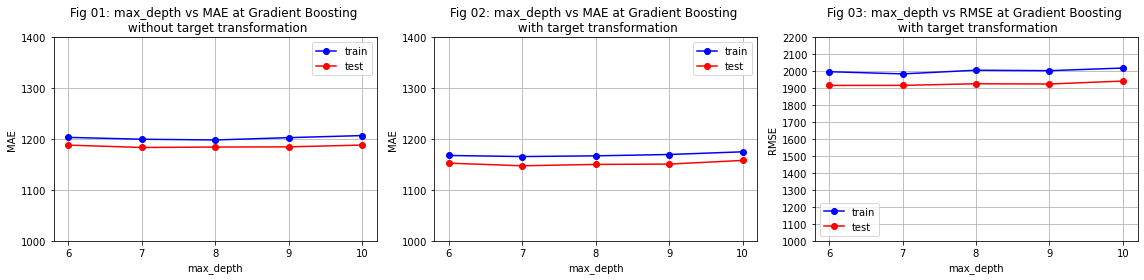

In [71]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.plot(regression_metrics.max_depth, regression_metrics.train_MAE, label='train', marker='o', color='b')
plt.plot(regression_metrics.max_depth, regression_metrics.test_MAE, label='test', marker='o', color='r')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("MAE")
plt.title("Fig 01: max_depth vs MAE at Gradient Boosting \n without target transformation")
plt.xticks(np.arange(6,11,1).tolist())
plt.yticks(np.arange(1000,1401,100).tolist())
plt.grid()

plt.subplot(1,3,2)
plt.plot(regression_metrics.max_depth, regression_metrics.TT_train_MAE, label='train', marker='o', color='b')
plt.plot(regression_metrics.max_depth, regression_metrics.TT_test_MAE, label='test', marker='o', color='r')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("MAE")
plt.title("Fig 02: max_depth vs MAE at Gradient Boosting \n with target transformation")
plt.xticks(np.arange(6,11,1).tolist())
plt.yticks(np.arange(1000,1401,100).tolist())
plt.grid()

plt.subplot(1,3,3)
plt.plot(regression_metrics.max_depth, model_GB_TT_train_RMSE, label='train', marker='o', color='b')
plt.plot(regression_metrics.max_depth, model_GB_TT_test_RMSE, label='test', marker='o', color='r')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("RMSE")
plt.title("Fig 03: max_depth vs RMSE at Gradient Boosting \n with target transformation")
plt.xticks(np.arange(6,11,1).tolist())
plt.yticks(np.arange(1000,2201,100).tolist())
plt.grid()

plt.tight_layout()
plt.show()

Fig 01: max_depth vs MAE at Gradient Boosting Regressor without target transformation

From the above Fig 01, the lowest training MAE is 1198.39 and the lowest testing MAE is 1183.65.
<br>For the different values of max_depth, 
<br>the standard deviation of the MAE at the train set and the test set are respectively 3 and 2.
<br>It seems the model is quite stable. The training and testing MAE are not varying drastically.

Fig 02: max_depth vs MAE at Gradient Boosting Regressor with target transformation

From the above Fig 02, the lowest training MAE is 1165.79 and the lowest testing MAE is 1147.63.
If we look at the dataframe of the grid search, for the different values of max_depth, 
<br>the standard deviation of the MAE at the train set and the test set are respectively 3.24 and 3.5
<br>It ensures the model is not overfitting or underfitting. The training and testing MAE for different hyperparameter settings are very close to each other.

Comparing Fig 01 and Fig 02, and their training & testing MAE, it's confirmed that - target transformation has improved the model performance.

Fig 03: max_depth vs RMSE at Gradient Boosting Regressor with target transformation

From the above Fig 03, the lowest training RMSE is 1984.79 and the lowest testing RMSE is 1916.95.
<br>For the different values of max_depth, 
<br>the standard deviation of the RMSE at the train set and the test set are respectively 11.3 and 9.36.
<br>From this scenario, It also seems the model is quite stable. The training and testing RMSE are not varying drastically.

Comparing Fig 02 and Fig 03, and their training & testing error, the best hyperparameters are -
<br>n_estimators=100
<br>learning_rate=0.1
<br>max_depth = 7

For each individual model,
<br>Number of folds in cross-validation = 5
<br>Number of hyperparamters = 5 (max_depth from 6 to 10)
<br>Number of iteration  = 5*5 = 25
<br>Total runtime = 19 mins


#### Training with the best hyperparameters

In [38]:
model_GB = GBRegressor_with_target_transformation(X_train, y_train, 
                                                  [100], [7], [0.1], 
                                                  'neg_mean_absolute_error',
                                                  PowerTransformer(method='box-cox'))

# saving the best model
pickle.dump(model_GB, open("model_GB.sav", 'wb'))

In [39]:
# loading the model for prediction
model_GB = pickle.load(open("model_GB.sav", 'rb'))

### Prediction and submission file creation

In [47]:
# inference with the finally selected features
predictions = model_GB.predict(test[rfe_cols])

# adding the predictions in the test dataFrame to get the index 'id'
test['loss'] = predictions

# separating the predicted 'loss' in a dataFrame
submission = test[['loss']]
display(submission.head())

# Generating submission .csv file
submission.to_csv("submission.csv", index=True)